In [1]:
import xarray as xr
import numpy as np
from pycontrails.core.met import MetDataArray, MetDataset
from pycontrails.ext.flight_gen import FlightGen
import pycontrails.models.boxmodel.boxm as boxm
import sys
import os
np.set_printoptions(threshold=sys.maxsize)

/home/ktait98/miniconda3/envs/contrails/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


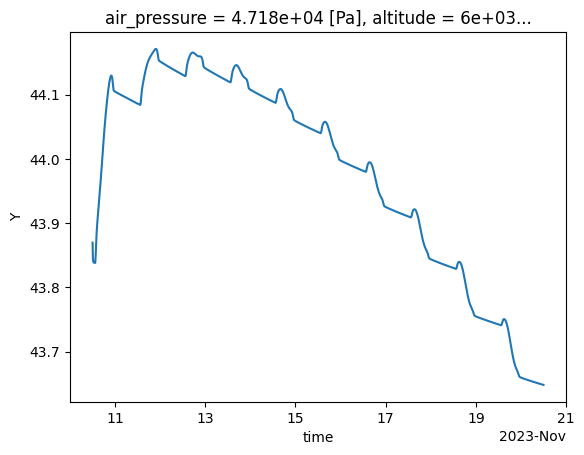

In [2]:
chem = xr.open_dataset("/home/ktait98/pycontrails_kt/pycontrails/models/boxmodel/boxm_ds.nc")

y_values = chem["Y"].sel(cell=300, species="O3")
emi_values = chem["emi"].sel(cell=181, emi_species="NO")

y_values.plot()


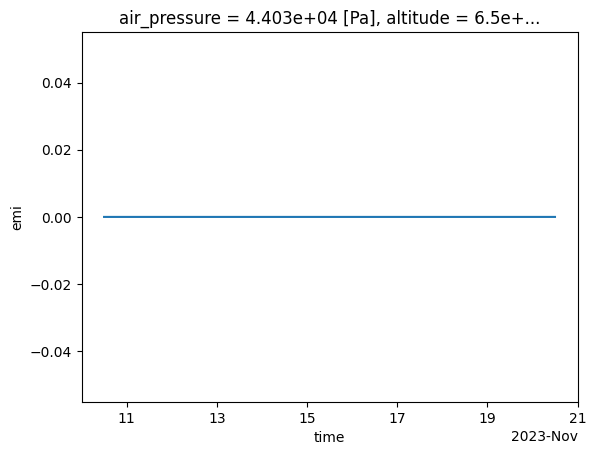

In [3]:
emi_values.plot()

In [4]:



y_values = chem["Y"].isel(time=230).sel(species="NO").values
emi_values = chem["emi"].isel(time=230).sel(emi_species="NO").values

for i, (y_val, emi_val) in enumerate(zip(y_values, emi_values)):
    # if 200 <= i <= 250:
    print(i, y_val, emi_val)

# for i, val in enumerate(chem["Y"].sel(cell=181, species="NO").values):
#     if 200 <= i <= 250:
#         print(i, val)

0 5.82520044040928e-09 0.0
1 5.884461703213477e-09 0.0
2 5.944052011593356e-09 0.0
3 6.003974222076343e-09 0.0
4 6.064230989316269e-09 0.0
5 6.12482463666557e-09 0.0
6 6.185757125031434e-09 0.0
7 6.2470303348813406e-09 0.0
8 6.308645911798613e-09 0.0
9 6.370605349303882e-09 0.0
10 6.432910137742873e-09 0.0
11 6.495561891737456e-09 0.0
12 5.833081376805437e-09 0.0
13 5.8916526682716e-09 0.0
14 5.950547363492041e-09 0.0
15 6.009768784761187e-09 0.0
16 6.06931992448875e-09 0.0
17 6.129203654773934e-09 0.0
18 6.189422330082904e-09 0.0
19 6.249978140873944e-09 0.0
20 6.310872941079818e-09 0.0
21 6.372108367276175e-09 0.0
22 6.433685859845503e-09 0.0
23 6.495606702633842e-09 0.0
24 5.840969107885818e-09 0.0
25 5.89885379412649e-09 0.0
26 5.957055584872961e-09 0.0
27 6.015577989867137e-09 0.0
28 6.074424373606358e-09 0.0
29 6.133597938654179e-09 0.0
30 6.19310154204286e-09 0.0
31 6.2529377129096885e-09 0.0
32 6.313108702837515e-09 0.0
33 6.373616441873256e-09 0.0
34 6.434462569497115e-09 0.0


In [5]:
for i, val in enumerate(chem["emi"].sel(cell=181, emi_species="NO").values):
    if 200 <= i <= 250:
        print(i, val)


200 0.0
201 0.0
202 0.0
203 0.0
204 0.0
205 0.0
206 0.0
207 0.0
208 0.0
209 0.0
210 0.0
211 0.0
212 0.0
213 0.0
214 0.0
215 0.0
216 0.0
217 0.0
218 0.0
219 0.0
220 0.0
221 0.0
222 0.0
223 0.0
224 0.0
225 0.0
226 0.0
227 0.0
228 0.0
229 0.0
230 0.0
231 0.0
232 0.0
233 0.0
234 0.0
235 0.0
236 0.0
237 0.0
238 0.0
239 0.0
240 0.0
241 0.0
242 0.0
243 0.0
244 0.0
245 0.0
246 0.0
247 0.0
248 0.0
249 0.0
250 0.0


In [6]:
# with open('species_num.txt', 'r') as file:
#     species_names = file.read().splitlines()

# species_names

# bg_chem["Y"] = xr.DataArray(
#     np.zeros((len(bg_chem["latitude"]), len(bg_chem["longitude"]), len(bg_chem["level"]), len(bg_chem["month"]), len(species_names))),
#     dims=('latitude', 'longitude', 'level', 'month', 'species'),
#     coords={'latitude': bg_chem["latitude"], 'longitude': bg_chem["longitude"], 'level': bg_chem["level"], 'species': species_names}
# )

# bg_chem = bg_chem.rename({"RN9O2": "RN902"})

# for i, species in enumerate(species_names):
#     if species in bg_chem:
#         bg_chem['Y'][:, :, :, :, i] = bg_chem[species].values
#         del bg_chem[species]

# if species.nc exists, delete first
# os.remove("species.nc")

# bg_chem.to_netcdf("species.nc")